# Centrifugal Pump (CP)
March 9th, 2025
Data analysis by Alex Quemel, Rahil Shaik, Sneha Kancharla, and Ethan Mibu

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

### Reading in Data from .csv

In [22]:
df = pd.read_csv("MW1-Centrifugal Pump Lab Raw Data - Sheet1.csv")

In [23]:
df

,impeller_diam,motor_speed,ext_fpm,field_voltage,armature_voltage,field_current,armature_current,pump_suction_pressure,pump_discharge_pressure,drive_shaft_torque,flowrate
0,3.500,50,2907.8,139,134,280,2.20,1.3,5.50,5.00,21.5000
1,3.500,40,2317.5,139,107,280,1.89,1.7,5.00,3.20,19.0000
2,3.500,30,1717.9,139,81,280,1.38,2.1,4.25,2.00,17.0000
3,3.500,20,1120.2,138,54,280,1.10,2.5,4.00,1.00,10.5000
4,3.500,10,519.2,138,22,280,0.80,2.6,3.50,0.95,0.0014
5,4.500,50,2770.0,140,130,300,3.60,1.0,6.80,10.50,28.0000
6,4.500,40,2252.0,140,105,290,2.62,1.1,5.80,7.00,26.0000
7,4.500,30,1673.5,140,80,290,1.90,1.7,5.00,4.00,20.7500
8,4.500,20,1074.8,140,50,285,1.30,2.4,4.00,2.00,14.5000
9,4.500,10,487.8,140,25,285,1.00,2.6,4.00,1.00,1.0000


### Analysis Question 1
$$ \textbf {For one impeller, plot head versus capacity with rotational speed as a parameter (See
references for determining head and capacity.)} $$

To start this question, we need to compute pump head for an impeller. Let's start with the 3.5 inch diameter impeller. 

The pump head is defined as the "height which the pump will lift fluid at a given flow rate" (Noel de Nevers, 3) which we can equate by
 
$$ h = \frac{P_{4} - P_{1}}{\rho * g} $$ 

(Noel de Nevers, eqn 10.20) 

We will define P_4 as the pump discharge pressure and P_1 as the pump suction pressure.

In [24]:
rho = 997 #kg/m^3
g = 9.81 #m/s^2

In [25]:
df["pump_head"] = (df["pump_discharge_pressure"] - df["pump_suction_pressure"]) / (rho * g)

Now let's plot this pump head against rotational speed

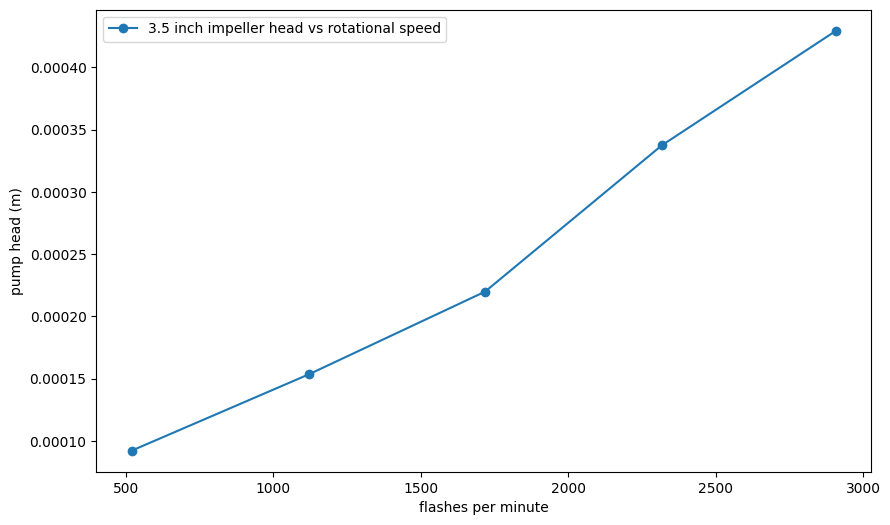

In [26]:
df_small = df.query("impeller_diam == 3.500")

plt.figure(figsize=(10,6))
plt.plot(df_small["ext_fpm"], df_small["pump_head"], marker="o", label="3.5 inch impeller head vs rotational speed")
plt.xlabel("flashes per minute")
plt.ylabel("pump head (m)")
plt.legend()

Let's plot the rest of the impeller sizes to ensure that this is the correct shape we should be looking for

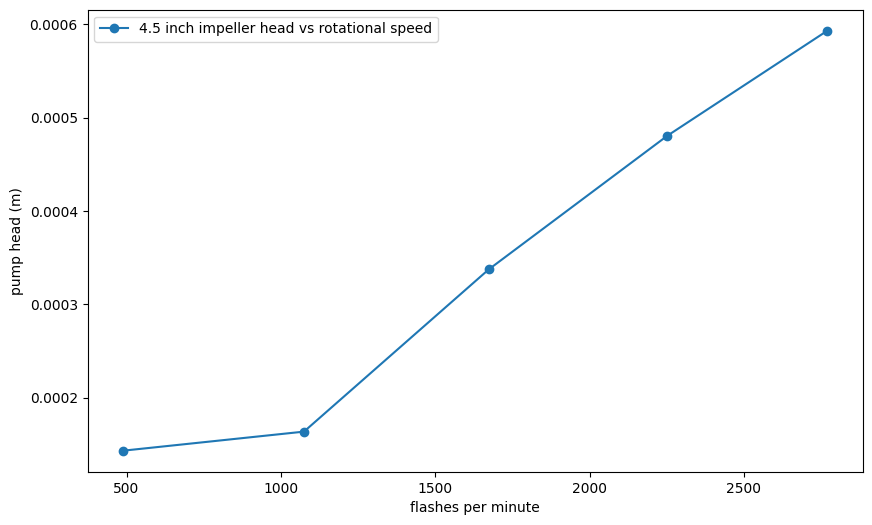

In [27]:
df_med = df.query("impeller_diam == 4.500")

plt.figure(figsize=(10,6))
plt.plot(df_med["ext_fpm"], df_med["pump_head"], marker="o", label="4.5 inch impeller head vs rotational speed")
plt.xlabel("flashes per minute")
plt.ylabel("pump head (m)")
plt.legend()

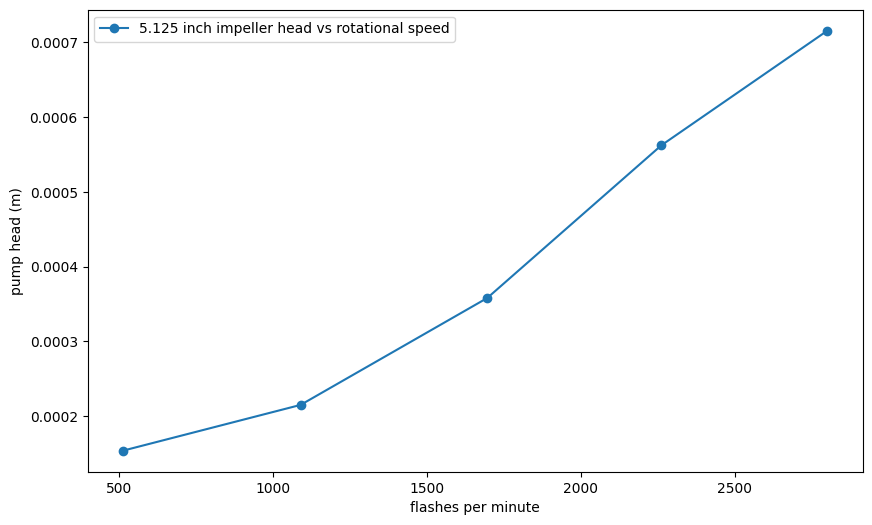

In [28]:
df_big = df.query("impeller_diam == 5.125")

plt.figure(figsize=(10,6))
plt.plot(df_big["ext_fpm"], df_big["pump_head"], marker="o", label="5.125 inch impeller head vs rotational speed")
plt.xlabel("flashes per minute")
plt.ylabel("pump head (m)")
plt.legend()

Now, we have a good sense of the shape, it is best reprsented by the 5.125 inch impeller so we will use this going forward. Let's synthesize a quantitative relationship that describes effect of rotational speed on head. The relationship appears polynomial, so we can fit a polynomial regression to this line. 

In [37]:
X = df_big[["ext_fpm"]].values 
y = df_big["pump_head"].values

In [31]:
X_quad = np.hstack((X, X**2))
model = LinearRegression()
model.fit(X_quad, y)

a, b = model.coef_[1], model.coef_[0]
c = model.intercept_

X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_fit_quad = np.hstack((X_fit, X_fit**2))
y_fit = model.predict(X_fit_quad)


In [41]:
def cubic(N, a, b, c, d):
    return a * N**3 + b * N**2 + c * N + d

popt_cubic, _ = curve_fit(cubic, X.flatten(), y)
y_fit_cubic = cubic(X_fit.flatten(), *popt_cubic)


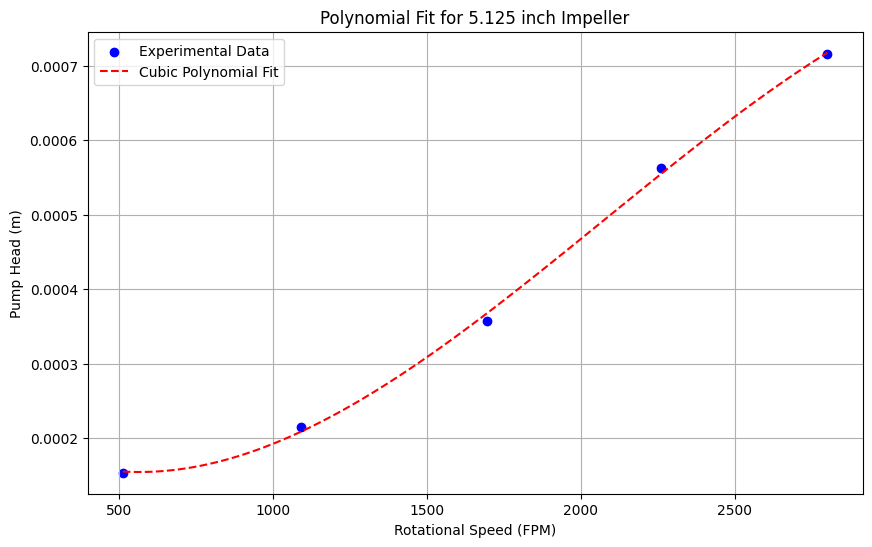

'Poly Fit Eqn = -4.948040e-14N³ + 3.076943e-10N² + -3.013540e-07N + 2.352954e-04'

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, label="Experimental Data", color="blue")
plt.plot(X_fit, y_fit_cubic, label="Cubic Polynomial Fit", color="red", linestyle="--")
plt.xlabel("Rotational Speed (FPM)")
plt.ylabel("Pump Head (m)")
plt.title(f"Polynomial Fit for {5.125} inch Impeller")
plt.legend()
plt.grid(True)
plt.show()

cubic_eq = f"Poly Fit Eqn = {popt_cubic[0]:.6e}N³ + {popt_cubic[1]:.6e}N² + {popt_cubic[2]:.6e}N + {popt_cubic[3]:.6e}"

cubic_eq


So, we can synthesize a head(fpm) expression of 

$$
h(fpm) = -0.0495 fpm^{3} + 0.0308 fpm^{2} -0.0000003 fpm + 0.00024 fpm
$$

### Analysis Question 2

$$ \textbf{Prepare a plot of head as a function of capacity for a single rpm.} $$